# Step Forward Cross Validation for Bioactivity Prediction

## Let's compare and see the changes in number of compounds after standardization and deduplication.

In [11]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [12]:
after_std = {}

for fname in os.listdir('../benchmark/data/standardized'):
    if fname.endswith('.csv'):
        df = pd.read_csv(f'../benchmark/data/standardized/{fname}')
        after_std[fname[:-4]] = len(df["standardized_smiles"])

In [13]:
before_std = {}

for fname in os.listdir('../benchmark/data/raw'):
    if fname.endswith('.csv'):
        df = pd.read_csv(f'../benchmark/data/raw/{fname}')
        before_std[fname[:-4]] = len(df["canonical_smiles"])

In [14]:
df = pd.DataFrame([before_std, after_std]).T
df.index.name = "Target"
df.columns = ["Before Standardization", "After Standardization"]
df

,Before Standardization,After Standardization
Target,,
target_CHEMBL1865-2.Ki,351,339
target_CHEMBL2148-2.Ki,207,202
target_CHEMBL3371-3.Ki,899,881
target_CHEMBL240-2.Ki,249,241
target_CHEMBL1163125-1.Ki,711,695
...,...,...
target_CHEMBL4794-2.Ki,283,277
target_CHEMBL325-1.Ki,1443,1371
target_CHEMBL5251-2.Ki,223,207


In [15]:
os.makedirs('../benchmark/results/tables', exist_ok=True)
os.makedirs('../benchmark/results/figures', exist_ok=True)

In [16]:
df.to_csv('../benchmark/results/tables/before_and_after_standardization.csv', index=False)

## Plotting this Relationship

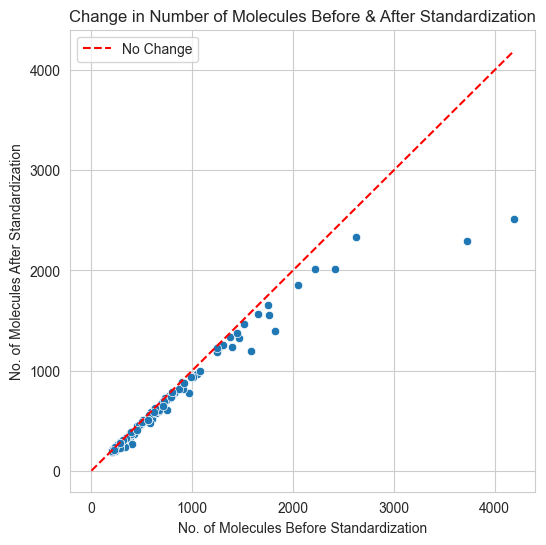

In [18]:
# Create the parity plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=df["Before Standardization"], y=df["After Standardization"])

# Add y = x reference line
max_val = max(df["Before Standardization"].max(), df["After Standardization"].max())
plt.plot([0, max_val], [0, max_val], linestyle="--", color="red", label="No Change")

# Labels and title
plt.xlabel("No. of Molecules Before Standardization")
plt.ylabel("No. of Molecules After Standardization")
plt.legend()

# Show the plot
plt.title("Change in Number of Molecules Before & After Standardization")
plt.savefig('../benchmark/results/figures/before_and_after_standardization.pdf')
plt.show()